<a href="https://colab.research.google.com/github/Tejal221293/Deep-Learning/blob/main/Text_Classification_With_Keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Text Classification (Sentiment anlalysis) - NLP (Natural Language Processing)

TFIDF - Term Frequency Inverse Document Frequency



In [1]:
from warnings import filterwarnings
filterwarnings("ignore")


## Step 1 - Data Ingestion


In [2]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv"
print(url)


https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Restaurant_Reviews.tsv


In [3]:
import pandas as pd
df = pd.read_csv(url, sep="\t")
df.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Step 2- Perform basic data quality checks


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [5]:
df.isna().sum()


,0
Review,0
Liked,0


In [6]:
df.duplicated().sum()


np.int64(4)

## Step 3 - Text preprocessing


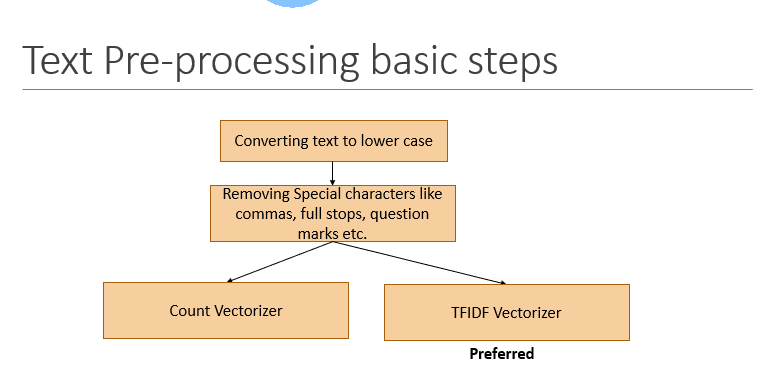

## ^[a-z0-9 ] Whatever is not a-z or 0-9 or space replace it with blank


## It will remove punctionations like .,!?


In [8]:
def preprocess_text(text: str) -> str:
  text = text.lower()
  text = re.sub("[^a-z0-9 ]", "", text) # Make sure add space after a-z0-9
  return text


In [9]:
preprocess_text("Amazing... The taste was very, good!")


'amazing the taste was very good'

## Apply above on the dataframe


In [10]:
df["pre"] = df["Review"].apply(preprocess_text)


In [11]:
df

,Review,Liked,pre
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


## Apply TFIDF Vectorizer on preprocessed text


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
tfidf = TfidfVectorizer()
X_pre = tfidf.fit_transform(df["pre"]).toarray()
X_pre


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
X_pre.shape


(1000, 2067)

## Apply SVD(Singular value decomposition)

Reduces number of columns to required number of colums

(Extract import features out of data)



In [15]:
from sklearn.decomposition import TruncatedSVD


In [16]:
# I want to extract 300 columns
n_components = 300

svd = TruncatedSVD(n_components)
X_pre_red = svd.fit_transform(X_pre)
X_pre_red


array([[ 0.11457856,  0.19021732,  0.29860514, ...,  0.06513383,
        -0.03949833, -0.00707822],
       [ 0.20041515,  0.06219206,  0.10386269, ...,  0.08139551,
        -0.04891663, -0.00179587],
       [ 0.248602  , -0.05947125, -0.09197253, ..., -0.01602177,
         0.01862119,  0.0107958 ],
       ...,
       [ 0.25745938,  0.21354302, -0.2526886 , ..., -0.01561578,
        -0.00986723,  0.00722582],
       [ 0.21755074,  0.04422346, -0.07900025, ..., -0.02932968,
         0.01855115,  0.02421178],
       [ 0.22278543,  0.02689928, -0.02221586, ..., -0.0424441 ,
        -0.01521831, -0.00579103]])

In [17]:
X_pre_red.shape


(1000, 300)

## TFIFD -> SVD : LSA (Latent Semantic Analysis)


## Train test split


In [18]:
Y = df[["Liked"]]


In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre_red, Y, test_size=0.2, random_state=42)


In [20]:
xtrain

array([[ 0.22714971, -0.1355275 , -0.05020054, ...,  0.09913964,
         0.00110892,  0.02567857],
       [ 0.04699212,  0.01342239,  0.0345173 , ...,  0.03972887,
        -0.01936712,  0.03767602],
       [ 0.19705026, -0.13148615, -0.08873095, ...,  0.00808843,
         0.01381154, -0.0014464 ],
       ...,
       [ 0.28454308,  0.11308599,  0.31554384, ..., -0.02546451,
        -0.01040234,  0.01322833],
       [ 0.16594076, -0.07105196, -0.05824827, ..., -0.04742981,
        -0.06673732, -0.02035767],
       [ 0.17456908,  0.04421884,  0.01479547, ..., -0.01819516,
        -0.06911272,  0.01744219]])

In [21]:
ytrain.head()


,Liked
29,0
535,1
695,0
557,0
836,1


In [22]:
xtest

array([[ 0.07691892,  0.1349416 , -0.0703831 , ..., -0.00826544,
         0.02195638,  0.00340089],
       [ 0.254266  , -0.07500539, -0.03373472, ...,  0.02195802,
         0.03181545, -0.00504796],
       [ 0.26574114,  0.01069197,  0.09623239, ...,  0.00900881,
        -0.03034847, -0.00647381],
       ...,
       [ 0.14916885,  0.1664999 ,  0.2207663 , ...,  0.04248499,
        -0.0212279 , -0.00138773],
       [ 0.14640626,  0.21286945, -0.21691327, ..., -0.02024106,
         0.00737043,  0.00373923],
       [ 0.32089175, -0.02481936,  0.01883727, ..., -0.01095149,
         0.03899312, -0.00785875]])

In [23]:
ytest.head()


,Liked
521,1
737,1
740,1
660,1
411,1


In [24]:
xtrain.shape


(800, 300)

In [25]:
xtest.shape


(200, 300)

In [26]:

xtrain.shape[1]


300

## Build the neural network

1. L1 - Lasso (Penalty applied on absolute value of weights)
2. L2 - Ridge -(Penalty applied on squared value of weights)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.callbacks import EarlyStopping
from keras import regularizers


In [28]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1],)),
        Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        Dropout(0.5),
        Dense(1, activation="sigmoid")
    ]
)


In [29]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,849 (183.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


In [31]:
es = EarlyStopping(patience=10, restore_best_weights=True)


In [32]:
hist = model.fit(
    xtrain, ytrain,
    validation_data = (xtest, ytest),
    batch_size=32,
    epochs=200,
    callbacks = [es]
)


Epoch 1/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.5030 - loss: 3.0352 - val_accuracy: 0.4900 - val_loss: 2.2175
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5653 - loss: 2.0167 - val_accuracy: 0.5400 - val_loss: 1.5212
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6153 - loss: 1.4057 - val_accuracy: 0.6100 - val_loss: 1.1305
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6443 - loss: 1.0655 - val_accuracy: 0.7000 - val_loss: 0.9199
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6838 - loss: 0.8815 - val_accuracy: 0.6550 - val_loss: 0.8089
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7251 - loss: 0.7832 - val_accuracy: 0.7400 - val_loss: 0.7499
Epoch 7/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8015 - loss: 0.7260 - val_accuracy: 0.7550 - val_loss: 0.7167
Epoch 8/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8475 - loss: 0.6847 - val_accuracy: 0.7700 - 

## Evaluate model


In [33]:
model.evaluate(xtrain, ytrain)


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9617 - loss: 0.3587


[0.3617204427719116, 0.9637500047683716]

In [34]:
model.evaluate(xtest, ytest)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8059 - loss: 0.6357 


[0.6089349985122681, 0.824999988079071]

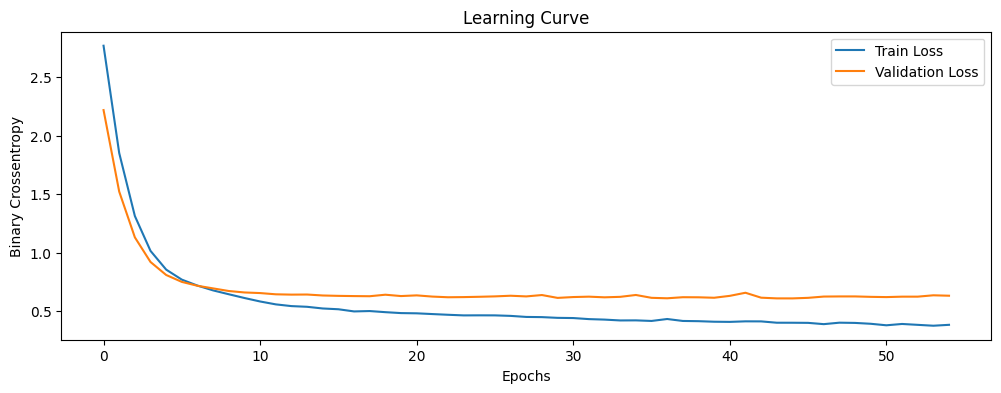

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label="Train Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Binary Crossentropy")
plt.title("Learning Curve")
plt.legend()
plt.show()


In [36]:
yprob_train = model.predict(xtrain)
yprob_train[0:5]


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[0.08017632],
       [0.953809  ],
       [0.02176129],
       [0.04675609],
       [0.97427696]], dtype=float32)

In [37]:
ypred_train = [1 if prob >= 0.5 else 0 for prob in yprob_train]
ypred_train[0:5]


[0, 1, 0, 0, 1]

In [38]:
ytrain.head()


,Liked
29,0
535,1
695,0
557,0
836,1


In [39]:
yprob_test = model.predict(xtest)
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


[0, 1, 1, 1, 1]

In [40]:
ytest.head()


,Liked
521,1
737,1
740,1
660,1
411,1


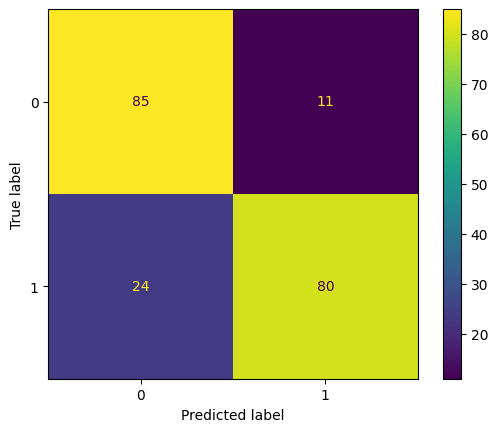

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)


In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))


              precision    recall  f1-score   support

           0       0.78      0.89      0.83        96
           1       0.88      0.77      0.82       104

    accuracy                           0.82       200
   macro avg       0.83      0.83      0.82       200
weighted avg       0.83      0.82      0.82       200



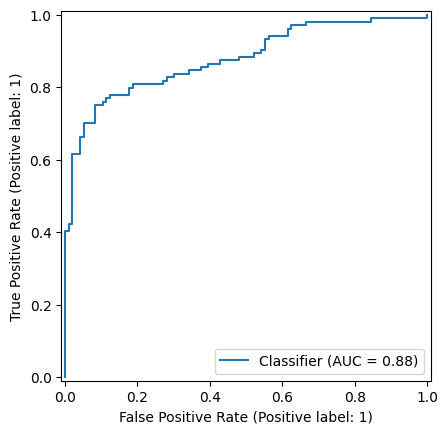

In [43]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(ytest, yprob_test)


## From above results i it clear that this model is a good model hence you can use it for out of sample prediction


## Out of sample prediction


In [44]:
def predict_sentiment(text: str):
  text = preprocess_text(text)
  text_pre = tfidf.transform([text]).toarray()
  text_pre_red = svd.transform(text_pre)
  prob = model.predict(text_pre_red)
  sentiment = "positive" if prob>=0.5 else "negative"
  return sentiment, prob


In [45]:
predict_sentiment("Amazing Restaurant ... Really liked the taste of Pizza!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


('positive', array([[0.9317671]], dtype=float32))

In [46]:
predict_sentiment("Very Bad Service, I also did not like the ambience...")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


('negative', array([[0.0578376]], dtype=float32))

In [47]:
predict_sentiment("Incredible Taste, I enjoyed the starters and main course!")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


('positive', array([[0.8897463]], dtype=float32))

## Save the model and preprocessors


In [48]:
tfidf



TfidfVectorizer()

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

## On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


> Add blockquote



In [49]:
svd

TruncatedSVD(n_components=300)

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

## On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [50]:
model


<Sequential name=sequential, built=True>

In [51]:
%pip install joblib


In [52]:
import joblib
joblib.dump(tfidf, "tfidf.joblib")


['tfidf.joblib']

In [53]:
joblib.dump(svd, "svd.joblib")


['svd.joblib']

In [54]:
model.save("Sentiment.keras")


## Opening above files


In [55]:
t = joblib.load("tfidf.joblib")
t


TfidfVectorizer()

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

## On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [56]:
s = joblib.load("svd.joblib")


In [57]:
s

TruncatedSVD(n_components=300)

## In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.

## On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.


In [58]:
from keras.models import load_model


In [59]:
m = load_model("Sentiment.keras")


In [60]:
m.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          38,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,549 (549.02 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,700 (366.02 KB)